In [3]:
import pandas as pd
import glob
#import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np



In [4]:
# colunas x, y, classe, quadro e segundo
df = pd.concat([pd.read_csv(f, names=['x', 'y', 'classe', 'quadro', 'segundo'])
               for f in glob.glob('centroids/*.csv')], ignore_index=True)


In [5]:
# nome classe COCO
df['nomeclasse'] = df['classe'].map({1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus', 7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light', 11: 'fire hydrant', 13: 'stop sign', 14: 'parking meter', 15: 'bench', 16: 'bird', 17: 'cat', 18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear', 24: 'zebra', 25: 'giraffe', 27: 'backpack', 28: 'umbrella', 31: 'handbag', 32: 'tie', 33: 'suitcase', 34: 'frisbee', 35: 'skis', 36: 'snowboard', 37: 'sports ball', 38: 'kite', 39: 'baseball bat', 40: 'baseball glove', 41: 'skateboard', 42: 'surfboard', 43: 'tennis racket',
                                    44: 'bottle', 46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon', 51: 'bowl', 52: 'banana', 53: 'apple', 54: 'sandwich', 55: 'orange', 56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 60: 'donut', 61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed', 67: 'dining table', 70: 'toilet', 72: 'tv', 73: 'laptop', 74: 'mouse', 75: 'remote', 76: 'keyboard', 77: 'cell phone', 78: 'microwave', 79: 'oven', 80: 'toaster', 81: 'sink', 82: 'refrigerator', 84: 'book', 85: 'clock', 86: 'vase', 87: 'scissors', 88: 'teddy bear', 89: 'hair drier', 90: 'toothbrush'})


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52593 entries, 0 to 52592
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   x           52593 non-null  int64 
 1   y           52593 non-null  int64 
 2   classe      52593 non-null  int64 
 3   quadro      52593 non-null  int64 
 4   segundo     52593 non-null  int64 
 5   nomeclasse  19004 non-null  object
dtypes: int64(5), object(1)
memory usage: 2.4+ MB


In [7]:
df.sample(10)


,x,y,classe,quadro,segundo,nomeclasse
11925,758,340,0,61500,1025,NaN
24093,1144,489,0,99540,1659,NaN
30517,1158,491,0,105060,1751,NaN
30036,326,430,0,101400,1690,NaN
51428,450,318,13,28860,481,stop sign
494,1147,493,0,91740,1529,NaN
9961,1106,281,0,38460,641,NaN
42130,1019,224,2,44940,749,bicycle
2248,992,289,0,73920,1232,NaN
20889,501,252,0,26400,440,NaN


In [8]:
# teste geodataframe
#gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(
#    df.x, df.y), crs='EPSG:31982')
#
#gdf['geometry'] = gdf['geometry'].scale(1, -1, origin=(0, 0, 0))


In [9]:
# rotate the points coordinates (x, y) as a role by 180 degrees
#df['x'] = df['x'].apply(lambda x: x * -1)

# flipt the points coordinates (x, y) as a role in the x axis
df['y'] = df['y'].apply(lambda y: y * -1)

<Axes: xlabel='x', ylabel='y'>

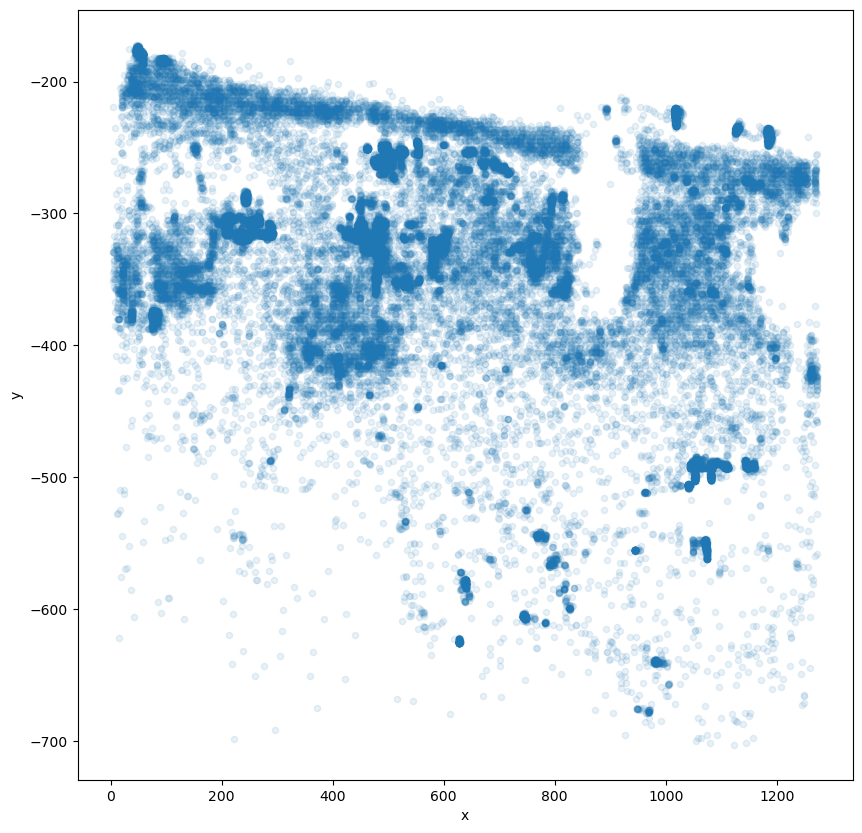

In [10]:
# plot
df.plot.scatter(x='x', y='y', figsize=(10, 10), alpha=0.1)

<Axes: xlabel='x', ylabel='y'>

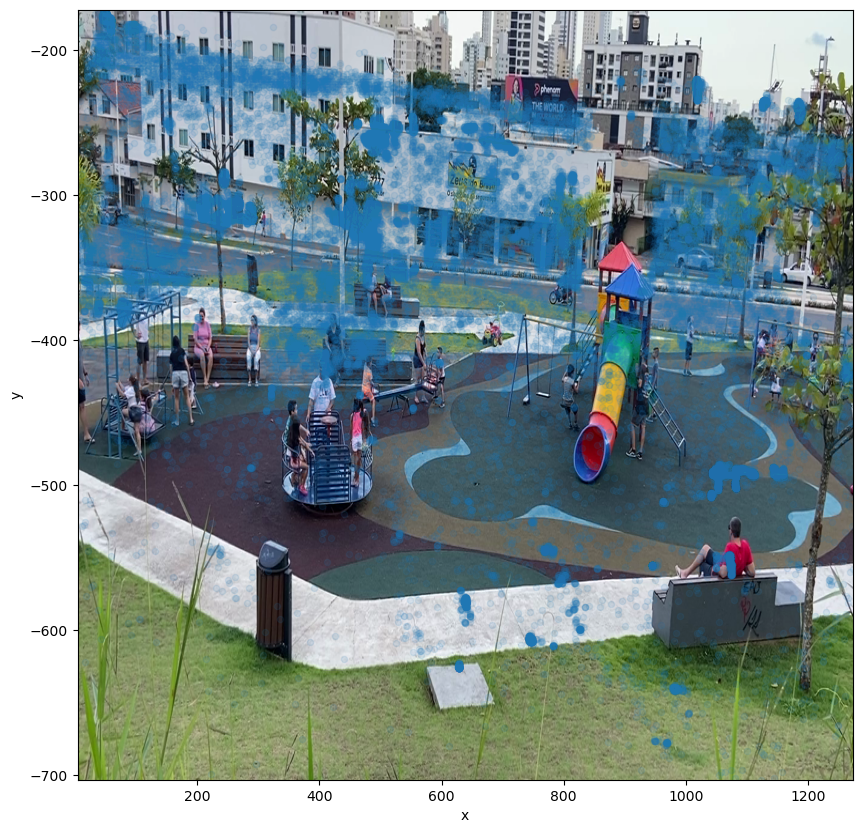

In [22]:
img = plt.imread('capturas/captura_background.png')

# sobrepor os pontos a imagem
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img, extent=[df['x'].min(), df['x'].max(), df['y'].min(), df['y'].max()], aspect='auto', zorder=0)
df.plot.scatter(x='x', y='y', figsize=(10, 10), alpha=0.1, ax=ax)
